In [2]:

import numpy as np
import matplotlib
import seaborn as sns
import pandas as pd
from pandas import DataFrame
#import mpl_toolkits
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from scipy.special import expit as sigmoid
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [3]:
path = r'C:\Users\Nursultan\Documents\Data Science\breast cancer\wdbc.data.csv'
df = pd.read_csv(path, names = ['ID', 'Diagnosis',
                    'MRadius', 'MTexture', 'Mper-ter', 'Marea', 'MSmooth-es',
                    'MComp-ness', 'MConcavity', 'MConcavPoints', 'MSymm-ry',
                    'MFractDimens', 'RadiusSE', 'TextureSE', 'Per-terSE',
                    'AreaSE', 'Smooth-esSE',
                    'Comp-nessSE', 'ConcavitySE', 'ConcavPointsSE', 
                    'Symm-rySE', 'FractDimensSE', 'WRadius', 'WTexture',
                    'WPer-ter', 'WArea', 'WSmooth-es',
                    'WComp-ness', 'WConcavity', 'WConcavPoints', 
                    'WSymm-ry', 'WFractDimens'])
df['Malignant'] = df.Diagnosis.map({'B':0, 'M':1})
df = df.drop('Diagnosis', 1)
df = df.drop('ID', 1)
df['Diagnosis'] = df['Malignant'].copy()
df['Diagnosis'].replace(0, 'Benign',inplace=True)
df['Diagnosis'].replace(1, 'Malignant',inplace=True)
#df.iloc[:5, 29]
df.head()

,MRadius,MTexture,Mper-ter,Marea,MSmooth-es,MComp-ness,MConcavity,MConcavPoints,MSymm-ry,MFractDimens,...,WPer-ter,WArea,WSmooth-es,WComp-ness,WConcavity,WConcavPoints,WSymm-ry,WFractDimens,Malignant,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,Malignant


# Test-Train Split

In [4]:
from sklearn.cross_validation import train_test_split
X, y = df.iloc[:, :30].values, df.iloc[:, 30].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)
y_train[:5]

array([0, 0, 0, 1, 0], dtype=int64)

# Feature Scaling 
We can see the features are measured on different scales, and would be beneficial
for almost any classifier. It's gonna be useful for my gradient decent.

   # Standardizaiton

In [5]:
'''
from sklearn import preprocessing
print(df.iloc[:4,3])

std_scale = preprocessing.StandardScaler().fit( df.iloc[:,2:32].values)
df_std = std_scale.transform( df.iloc[:,2:32].values)
print('Mean after standardization:')
print('   Mean Radius={:.2f}, Mean Area={:.2f}'.format(df_std[:,2].mean(), df_std[:,5].mean()) ,\
      'Mean Smoothness={:.2f} '.format(df_std[:,6].mean()))
print('Stand. dev. after stand-tion:')
print('   Mean Radius={:.2f}, Mean Area={:.2f},'.format(df_std[:,2].std(), df_std[:,5].std()) ,\
      'Mean Smoothness={:.2f} '.format(df_std[:,6].std()))
'''
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Eigendecomposition of the covariance matrix

In [6]:
'''
cov_mat = np.cov(X_train_std.T)
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)
'''

"\ncov_mat = np.cov(X_train_std.T)\ncov_mat = np.cov(X_train_std.T)\neigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)\n\nprint('\nEigenvalues \n%s' % eigen_vals)\n"

# Total and explained variance

In [7]:
'''
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
'''

'\ntot = sum(eigen_vals)\nvar_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]\ncum_var_exp = np.cumsum(var_exp)\n'

In [8]:
'''


plt.bar(range(1, 31), var_exp, alpha=0.5, align='center',
        label='individual variance explained variance')
plt.step(range(1, 31), cum_var_exp, where='mid',
        label='cumulative variance ratio')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.savefig(r'C:\Users\Nursultan\Documents\Data Science\breast cancer\figures\PCA1.png', dpi=300)
plt.tight_layout()
'''

"\n\n\nplt.bar(range(1, 31), var_exp, alpha=0.5, align='center',\n        label='individual variance explained variance')\nplt.step(range(1, 31), cum_var_exp, where='mid',\n        label='cumulative variance ratio')\nplt.ylabel('Explained variance ratio')\nplt.xlabel('Principal components')\nplt.legend(loc='best')\nplt.savefig(r'C:\\Users\\Nursultan\\Documents\\Data Science\x08reast cancer\x0cigures\\PCA1.png', dpi=300)\nplt.tight_layout()\n"

## Feature transformation

In [9]:
'''
#Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

#Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)
'''

'\n#Make a list of (eigenvalue, eigenvector) tuples\neigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]\n\n#Sort the (eigenvalue, eigenvector) tuples from high to low\neigen_pairs.sort(reverse=True)\n'

In [10]:
'''
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis],
              #eigen_pairs[2][1][:, np.newaxis]
              ))
w
'''

'\nw = np.hstack((eigen_pairs[0][1][:, np.newaxis],\n              eigen_pairs[1][1][:, np.newaxis],\n              #eigen_pairs[2][1][:, np.newaxis]\n              ))\nw\n'

In [11]:
#%pylab inline
'''
X_train_pca = X_train_std.dot(w)
colors = ['r', 'g']
markers = ['x', 'o']

for l,c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=c, marker=m)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig(r'C:\Users\Nursultan\Documents\Data Science\breast cancer\figures\PCA2.png', dpi=300)



'''

"\nX_train_pca = X_train_std.dot(w)\ncolors = ['r', 'g']\nmarkers = ['x', 'o']\n\nfor l,c, m in zip(np.unique(y_train), colors, markers):\n    plt.scatter(X_train_pca[y_train==l, 0],\n                X_train_pca[y_train==l, 1],\n                c=c, label=c, marker=m)\nplt.xlabel('Principal component 1')\nplt.ylabel('Principal component 2')\nplt.legend(loc='lower left')\nplt.tight_layout()\nplt.savefig(r'C:\\Users\\Nursultan\\Documents\\Data Science\x08reast cancer\x0cigures\\PCA2.png', dpi=300)\n\n\n\n"

In [12]:
#X_train_std[0].dot(w)

# Supervised data compression via linear discriminant analysis
        It's a always useful LDA is a dimensionality reduction technique, similar to PCA. The" goal is to
    project a dataset onto a lower-dimensional space with good class-separability in order to avoid overfitting ("curse of dimensionality") and also reduce computational costs." ( From Sebastian Raschka's article) http://sebastianraschka.com/Articles/2014_python_lda.html

# Computing scatter matrices
    Calculate the mean vector for each class

In [13]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(0,2):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 0: [-0.5562 -0.3004 -0.5661 -0.5362 -0.2885 -0.4793 -0.5501 -0.6029 -0.26
  0.0145 -0.4312  0.0289 -0.4228 -0.4072  0.0602 -0.2184 -0.1797 -0.3019
  0.0119 -0.0481 -0.5926 -0.3362 -0.5974 -0.5565 -0.3345 -0.4689 -0.5374
 -0.6207 -0.3291 -0.2531]

MV 1: [-0.5562 -0.3004 -0.5661 -0.5362 -0.2885 -0.4793 -0.5501 -0.6029 -0.26
  0.0145 -0.4312  0.0289 -0.4228 -0.4072  0.0602 -0.2184 -0.1797 -0.3019
  0.0119 -0.0481 -0.5926 -0.3362 -0.5974 -0.5565 -0.3345 -0.4689 -0.5374
 -0.6207 -0.3291 -0.2531]



Compute the within-class scatter-matrix

In [14]:
n_features = 30
S_W = np.zeros((n_features, n_features))
for label, mv in zip(range(0,2), mean_vecs):
    class_scatter = np.zeros((n_features, n_features))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(n_features, 1), mv.reshape(n_features, 1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter
print('Within-class scatter matrix: %sx%s ' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 30x30 


In [15]:
print('Class label distribution: %s' % np.bincount(y_train)[0:])

Class label distribution: [249 149]


In [16]:
n_features = 30
S_W = np.zeros((n_features, n_features))
for label,mv in zip(range(0, 2), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 30x30


Compute the between-class scatter matrix:

In [17]:
mean_overall = np.mean(X_train_std, axis=0)
n_features = 30
S_B = np.zeros((n_features, n_features))
for i,mean_vec in enumerate(mean_vecs):
    n = X_train[y_train==i+1, :].shape[0]
    mean_vec = mean_vec.reshape(n_features, 1) # make column vector
    mean_overall = mean_overall.reshape(n_features, 1) # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 30x30


# Selecting linear discriminants for the new feature subspace
We are interested in the eigenvectors that correspond to largest eigenvalues

In [18]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

#Sorting eigenvectors in decreasing order of the eigenvalues:
# Making a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

#Soring tuples from high to low
eigen_pairs = sorted(eigen_pairs, key = lambda k : k[0], reverse =True)

print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

146.528674616
2.80158679951e-11
1.01303980213e-11
2.83554211635e-12
2.83554211635e-12
2.41170110866e-12
1.3378763046e-12
1.3378763046e-12
9.50443877778e-13
9.50443877778e-13
5.63718716661e-13
5.63718716661e-13
3.31710685552e-13
3.31710685552e-13
1.84940301057e-13
1.84940301057e-13
1.32375909358e-13
1.32375909358e-13
1.24389687808e-13
1.24389687808e-13
7.81226379645e-14
7.81226379645e-14
7.38087997022e-14
7.38087997022e-14
6.99905121607e-14
2.54481889146e-14
2.54481889146e-14
4.2493340982e-15
4.2493340982e-15
2.82736380248e-15


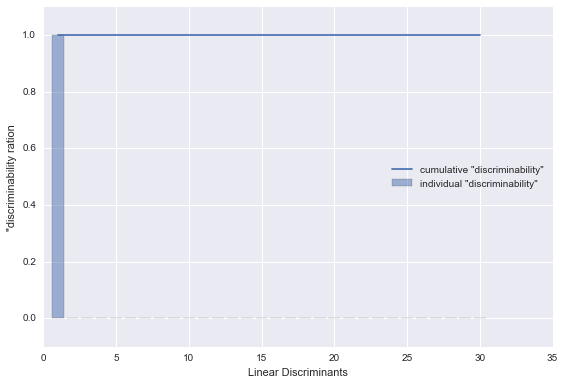

In [19]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 31), discr, alpha=0.5, align='center',
       label='individual "discriminability" ')
plt.step(range(1, 31), cum_discr, where='mid',
        label='cumulative "discriminability"')
plt.ylabel('"discriminability ration')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()


In [20]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
                      eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

('Matrix W:\n', array([[  4.6551e-01,  -6.2406e-01],
       [ -2.1457e-02,   2.0345e-02],
       [ -5.0800e-01,   3.4033e-01],
       [  7.4741e-02,  -6.6866e-02],
       [  1.7191e-04,  -1.1578e-03],
       [  1.6863e-01,  -1.8062e-01],
       [ -2.7998e-02,   3.0885e-02],
       [ -5.0588e-02,   5.2546e-02],
       [ -2.4287e-02,   2.5535e-02],
       [  2.2087e-03,  -2.8192e-03],
       [ -1.4908e-01,   1.6131e-01],
       [ -1.0311e-02,   1.0168e-02],
       [  9.0851e-02,  -1.0311e-01],
       [  5.0213e-03,  -2.1625e-03],
       [ -1.5117e-02,   1.5556e-02],
       [ -1.9196e-03,   4.0911e-03],
       [  3.5237e-02,  -3.7933e-02],
       [ -2.9184e-02,   3.5777e-02],
       [ -2.3727e-02,   2.4573e-02],
       [  4.8746e-02,  -5.2353e-02],
       [ -5.0797e-01,   4.6086e-01],
       [ -1.9519e-02,   2.0059e-02],
       [ -5.6788e-02,   6.2314e-02],
       [  4.1614e-01,  -4.1878e-01],
       [ -2.1757e-02,   2.3583e-02],
       [  6.5762e-03,  -1.3106e-02],
       [ -6.8901e-02, 

# Projecting onto the new feature space

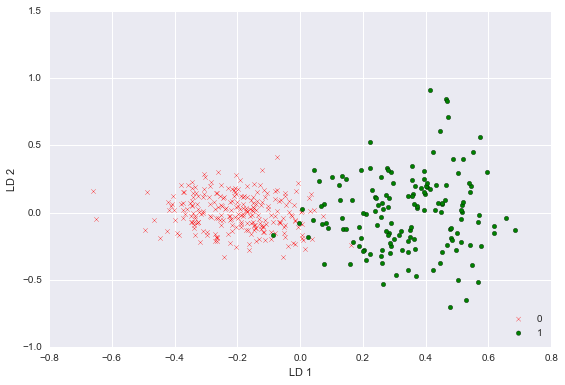

In [21]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'g']
markers = ['x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0] * (-1), 
                X_train_lda[y_train==l, 1] * (-1), 
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()

# LDA via scikit-learn

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_train_lda.shape


(398L, 1L)

In [24]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('x', 'o', 's', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
X_test_lda = lda.transform(X_test_std)
y_pred = lr.predict(X_test_lda)
accuracy_score(y_test, y_pred)
X_train_lda.shape

(398L, 1L)

# Min-Max Scaling

In [31]:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler().fit(df.iloc[:,:30].values)
df_minmax = minmax_scale.transform(df.iloc[:,:30].values)
print('Min value after min-max:')
print('  Mean Radius={:.2f}, Mean Area={:.2f}'.format(df_minmax[:,0].min(), df_minmax[:,3].min()) ,\
      'Mean Smoothness={:.2f}'.format(df_minmax[:,4].min())) 
print('Max value after min-max:')
print('  Mean Radius={:.2f}, Mean Area={:.2f}'.format(df_minmax[:,0].max(), df_minmax[:,3].max()) ,\
      'Mean Smoothness={:.2f}'.format(df_minmax[:,4].max())) 

Min value after min-max:
('  Mean Radius=0.00, Mean Area=0.00', 'Mean Smoothness=0.00')
Max value after min-max:
('  Mean Radius=1.00, Mean Area=1.00', 'Mean Smoothness=1.00')


# Plotting

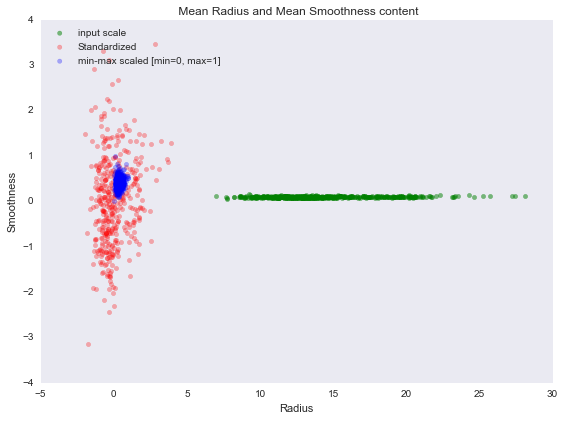

In [33]:



def plot():
    plt.figure(figsize=(8,6))
    
    plt.scatter(df.iloc[:,0], df.iloc[:,4], 
               color = 'green', label='input scale', alpha=0.5)
    plt.scatter(X_train_std[:,0], X_train_std[:,4], color='red',
            label = 'Standardized', alpha=0.3)
    plt.scatter(df_minmax[:,0], df_minmax[:,4], color='blue', 
                label='min-max scaled [min=0, max=1]', alpha=0.3)
    plt.title(" Mean Radius and Mean Smoothness content")
    plt.xlabel('Radius')
    plt.ylabel('Smoothness')
    plt.legend(loc='upper left')
    plt.grid()
    
    plt.tight_layout()

plot()
plt.show()
    

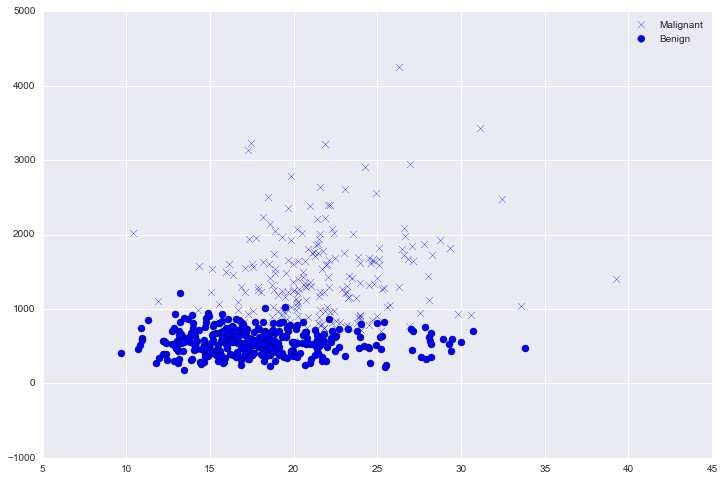

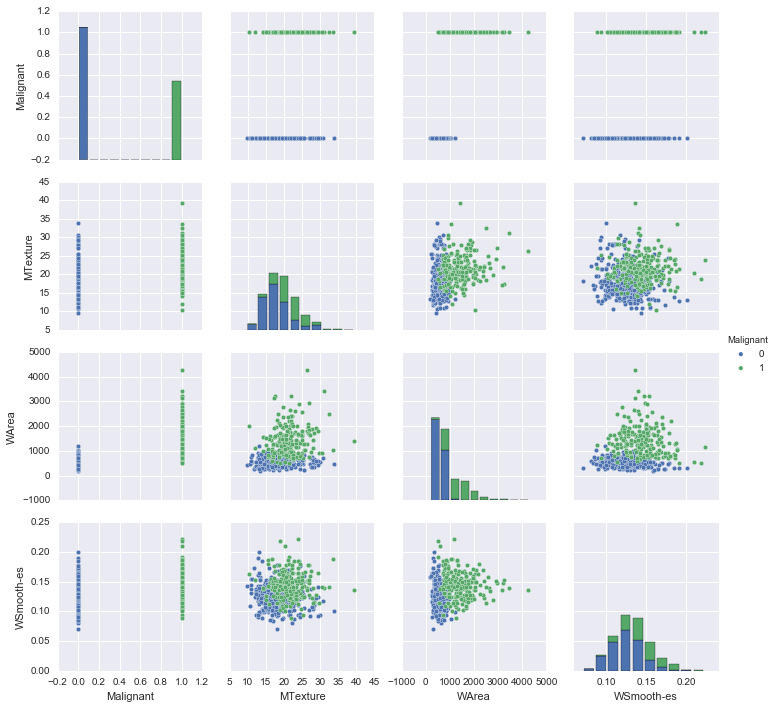

In [34]:

malignant = df[df['Malignant'].isin([1])]
benign = df[df['Malignant'].isin([0])]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(malignant['MTexture'], malignant['WArea'], s=50, marker='x', label='Malignant')
ax.scatter(benign['MTexture'], benign['WArea'], s=50, marker='o', label='Benign')
ax.legend()

seabornMatrix = sns.pairplot(df[['Malignant','MTexture','WArea','WSmooth-es']],hue="Malignant")
seabornMatrix.savefig("SeabornMatrix.png")

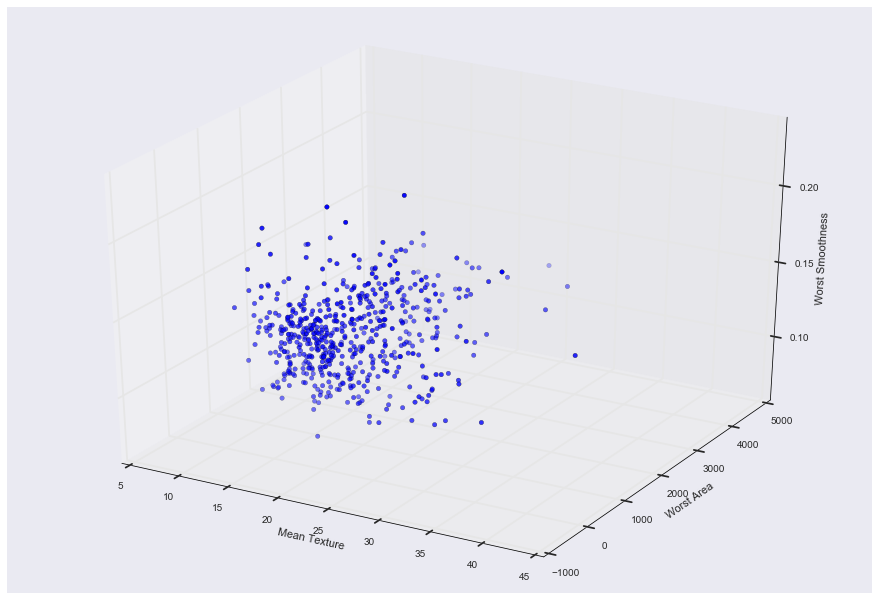

In [35]:
#df.index=range(0,569,1)
visualIn3D = plt.figure().gca(projection='3d')
fig3D = plt.gcf()
fig3D.set_size_inches(15.5, 10.5)
visualIn3D.scatter(df['MTexture'], df['WArea'], df['WSmooth-es'], c= 'b')
visualIn3D.set_xlabel('Mean Texture')
visualIn3D.set_ylabel('Worst Area')
visualIn3D.set_zlabel('Worst Smoothness')
plt.show()
fig3D.savefig('3D visualization.png', bbox_inches='tight')

In [ ]:
'''
X = df.iloc[:,2:32].values

print(type(X))
#numpyMatrix = df.as_matrix()

y= df.Malignant.values
print(type(y))
#y.reshape(569,1)


'''

In [37]:
num_samples = len(X_train_lda)
print(num_samples)
nn_inputs = 1
nn_outputs = 2
epsilon = 0.01
reg_lambda = 0.01

398


In [57]:
def calc_error(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    #z1 = X.dot(W1) + b1
    z1 = X_train_lda.dot(W1) + b1
    #a1= np.tanh(z1)
    #using sigmoid activation function instead of hyperbolic tangent
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores/np.sum(exp_scores, axis=1, keepdims = True)
    
    #calculating the error
    #correct_logprobs = - np.log(probs[range(num_samples), y])
    correct_logprobs = - np.log(probs[range(num_samples), y_train])
    error = np.sum(correct_logprobs)
    #optional regularization term
    error += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_samples * error

In [58]:
def feed_forward(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    #propagate forward
    #calc the dot product of input layer and its weights and add 1st bias term
    z1 = x.dot(W1) + b1
    #apply tanh activation function
    #a1 = np.tanh(z1)
    #using sigmoid activation function instead of hyperbolic tangent
    a1 = sigmoid(z1)
    #calc the dot product of the output of tanh func applied
    # to input layer and its weights and add 2nd bias term
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(prob, axis=1)

In [67]:
#function to learn the param-s for the NN and return the model
# hid_dim - hidden layer dimension - # of nodes in hidden layer
# num_passes - num of passes through the training set for gradient descent
# print_loss - if true, prints the loss every 1000 iterations
def build_model(hid_dim, num_passes = 5000, print_loss=False):
    #initialize param-s randomly, we need to learn them
    np.random.seed(0)
    W1 = np.random.randn(nn_inputs, hid_dim)/ np.sqrt(nn_inputs)
    b1 = np.zeros((1, hid_dim))
    W2 = np.random.randn(hid_dim,nn_outputs) / np.sqrt(hid_dim)
    b2 = np.zeros((1, nn_outputs))
    
    model = {}
    
    #Gradient descent
    for i in xrange(0, num_passes):
        
        #feed forward
        #z1 = X.dot(W1) + b1
        z1 = X_train_lda.dot(W1) + b1
        #a1 = np.tanh(z1)
        #using sigmoid activation function instead of hyperbolic tangent
        a1 = sigmoid(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        #Backpropagate
        delta3 = probs
        # delta3[range(num_samples), y] -= 1
        delta3[range(num_samples), y_train] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        #delta2 = delta3.dot(W2.T) * (1 - np.power(a1,2))
        #derivative of sigmoid function f(x) = 1./ (1+ e^(-x)) is f'(x) = f(x) * (1-f(x))
        delta2 = delta3.dot(W2.T) * (a1 * (1 - a1))
        #dW1 = np.dot(X.T, delta2)
        dW1 = np.dot( X_train_lda.T, delta2)
        db1 = np.sum(delta2, axis =0)
        
        #add regularization terms (b1 and b2 aren't regularized)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        
        #Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        #optionally print the loss
        if print_loss and i % 100 == 0:
            print "Loss after iteration %i: %f" %(i, calc_error(model))
    return model

In [68]:
# Build a model with a 10-dim hidden layer
model = build_model(1, print_loss=True)

Loss after iteration 0: 0.472278
Loss after iteration 100: 0.070998
Loss after iteration 200: 0.069488
Loss after iteration 300: 0.068682
Loss after iteration 400: 0.068230
Loss after iteration 500: 0.067962
Loss after iteration 600: 0.067791
Loss after iteration 700: 0.067676
Loss after iteration 800: 0.067595
Loss after iteration 900: 0.067535
Loss after iteration 1000: 0.067491
Loss after iteration 1100: 0.067456
Loss after iteration 1200: 0.067430
Loss after iteration 1300: 0.067409
Loss after iteration 1400: 0.067392
Loss after iteration 1500: 0.067378
Loss after iteration 1600: 0.067367
Loss after iteration 1700: 0.067357
Loss after iteration 1800: 0.067350
Loss after iteration 1900: 0.067343
Loss after iteration 2000: 0.067338
Loss after iteration 2100: 0.067333
Loss after iteration 2200: 0.067329
Loss after iteration 2300: 0.067326
Loss after iteration 2400: 0.067323
Loss after iteration 2500: 0.067321
Loss after iteration 2600: 0.067319
Loss after iteration 2700: 0.067317
Loss